<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/eras/eras/tune/programs/prototypeModelMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021/01/08：
全結合層のみのモデル

#共通設定

In [1]:
%tensorflow_version 2.x

##import

In [2]:
# file dealing
import os
import shutil
from google.colab import drive
# data dealing
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
# process deasing
import gc

# machine learning (back)
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, initializers, callbacks

# machine learning
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical

##スクラッチ

In [ ]:
keras.backend.clear_session()
gc.collect()

## データフォーマットを規定

In [3]:
class video_format:
  name = "video_format"
  # サンプリングされたCMデータの仕様
  playtime = "15秒"
  displaysize = "(any, any, RGB)"
  videoformat = "any"
  # モデルが扱うCMデータ(上のようなデータは、下のように変換される)
  HEIGHT = 45
  WIDTH = 80
  FRAME_SIZE = 30
  COLORinfo = 3 # "RGB"
  FPS = "2 (FRAME_SIZE / playtime)" # 定義ではなく上から導かれた値

format1 = video_format()

#モデル作成

In [4]:
seed = 20201218
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
# モデル作成
model = models.Sequential()
# 入力層
model.add(
     layers.Reshape(
        (format1.FRAME_SIZE,
         format1.HEIGHT,
         format1.WIDTH,
         format1.COLORinfo),
        input_shape=(format1.FRAME_SIZE * format1.HEIGHT * format1.WIDTH * format1.COLORinfo,),
        name='ENTRANCE' )
)
# 中間層
## ドロップアウト0
model.add(layers.Dropout(0.5))

## 畳み込み_0
model.add(
    layers.Conv3D(
        filters=32,
        kernel_size=(3, 3, 3),
        strides=(1, 1, 1),
        padding='same',
        activation='relu',
        name='conv_0'))
## pool_0
model.add(
    layers.MaxPooling3D(pool_size=(3, 3, 3), name='pool_0'))

## ドロップアウト1
model.add(layers.Dropout(0.5))
## 全結合0
model.add(
    layers.Flatten(name='pipe'),
)
model.add(
    layers.Dense(512,
      activation='relu',
      name='DAM' ),
)
# 出力層
model.add(
    layers.Dense(4, activation='softmax', name='WATERSUPPLY')
)

# 最適化
adam = keras.optimizers.Adam(
    lr=1e-7, beta_1=0.9, beta_2=0.999,
    epsilon=None, decay=0.0, amsgrad=False)
# 誤差関数
mse = tf.keras.losses.MeanSquaredError()
cce = tf.keras.losses.CategoricalCrossentropy()

model.compile(
    optimizer=adam,
    loss=cce,
    metrics=['acc', cce])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ENTRANCE (Reshape)           (None, 30, 45, 80, 3)     0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 45, 80, 3)     0         
_________________________________________________________________
conv_1 (Conv3D)              (None, 30, 45, 80, 32)    2624      
_________________________________________________________________
pool_1 (MaxPooling3D)        (None, 10, 15, 26, 32)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 15, 26, 32)    0         
_________________________________________________________________
pipe (Flatten)               (None, 124800)            0         
_________________________________________________________________
DAM (Dense)                  (None, 512)               6

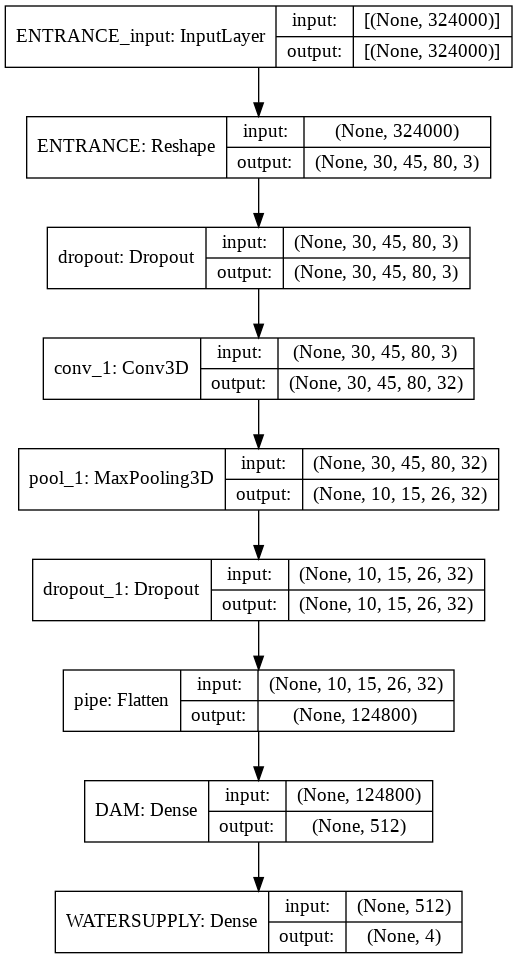

In [15]:
model.summary()
plot_model(
  model,
  show_shapes=True,
  )